In [25]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

# Partie 1

In [26]:
## Question 1

# p est le vecteur des probabilités correspondant à la loi de X
# x est le vecteur des valeurs possibles pour X
# M est le nombre désiré de simulation de la variable X 
def sim_dis (p, x, M):
    y = []
    for i in range(0, M):
        u = np.random.uniform(0, 1)
        j = 1
        while ( u > np.sum(p[:j]) ):
            j += 1
        y.append(x[j-1])
    return y

In [27]:
## Test

x = [ i for i in range(10)]
probas = np.random.dirichlet(np.ones(10))

print("Considérons le vecteur x = range(0,10) des valeurs souhaitées ainsi que")
print("probas = {} l'ensemble des probabilités correspondantes".format(probas))

print("On a alors la simulation {} pour un échantillon de taille 10".format(sim_dis(probas, x, 10)))


Considérons le vecteur x = range(0,10) des valeurs souhaitées ainsi que
probas = [0.0027776  0.28995206 0.25469019 0.03503146 0.06039951 0.09469899
 0.03605488 0.05351087 0.04579175 0.12709268] l'ensemble des probabilités correspondantes
On a alors la simulation [1, 3, 2, 1, 8, 1, 7, 2, 1, 7] pour un échantillon de taille 10


In [28]:
## Question 2

def simulation_marche(N=100, S0=5, p=0.5, M=1000):
    R = np.zeros((N + 1,M))
    R[0] = S0
    for n in range(1, N + 1):
        sim = sim_dis([p, 1-p], [-1, 1], M)
        R[n] = R[n - 1] + sim
    return R


def simulation_visuelle_trajectoire(N2= 100, M2=10):
    arr = simulation_marche(M=M2)
    for i in range(0, M2):
        plt.plot(np.linspace(0, N2, N2+1), arr[:,i])
    plt.show()


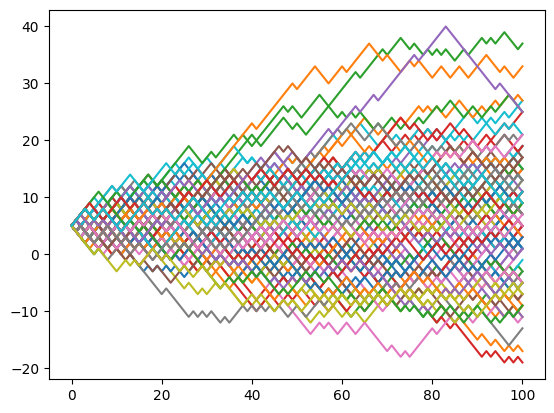

In [29]:
## Test 

simulation_visuelle_trajectoire(M2 = 100)

In [30]:
## Question 3

def Q3_monte_carlo(N3=100, M3=1000):
    sim = simulation_marche(N=N3, M=M3)[-1]
    return sum(sim >= 5)/M3


In [31]:
## Test
testQ3 = Q3_monte_carlo()
print("Une estimation de la probabilité par la méthode de Monte Carlo que S_N >= 5 est {}".format(testQ3))

Une estimation de la probabilité par la méthode de Monte Carlo que S_N >= 5 est 0.519


# Détermination de l'intervalle de confiance

Pour déterminer l'intervalle de confiance à 95% de notre estimation $S_N \ge 5$, on remarque que:
- En posant une fonction indicatrice $\forall k \in [1; M], Y_k = \mathbb{1}_{S_N^k \ge 5}$, alors
    $$
    Y_k = \left\{ {1, \text{si } S_N^k \ge 5 \atop 0, \text{sinon}}\right.
    $$
- Or, la probabilité qu'on recherche est $\mathbb{P}(S_N^k \ge 5) = p_k$, et par propriété de la fonction indicatrice,
$\mathbb{E}(Y_k) = p$ et $Y_k \sim \mathcal{B}(1, p_k)$.
- De plus, les $Y_k$ étant iid, tous les $p_k$ sont égaux, donc on a $\forall k \in [1, M], p_k = p$ et 
$$
\forall k \in [1, M], Y_k \sim \mathcal{B}(1, p)
$$.


Etudions $\hat Y_M = \frac{1}{M}\sum_{k=1}^{M}(Y_k)$
- On a $\mathbb{E}(\hat Y_M) = \frac{1}{M}\sum_{k=1}^{M}\mathbb{E}(Y_k) =\frac{1}{M}\sum_{k=1}^{M} \mathbb{P}(S_N^k \ge 5) = \mathbb{P}(S_N^k \ge 5) = p$ car les $S_N^k$ sont iid. D'où $\hat Y_M$ est sans biais.
- On a $\mathbb{V}(\hat Y_M) = \frac{1}{M^2} * M *\mathbb{V}(Y_1) = \frac{1}{M} * [ \mathbb{E}(\mathbb{1}_{S_N^k \ge 5})^2  -  (\mathbb{E}(\mathbb{1}_{S_N^k \ge 5}))^2] = \frac{1}{M}*p*(1-p)$


D'après le théorème central limite:
$$
\sqrt{\frac{M}{p(1-p)}}|\hat Y_M - p | \sim \mathcal{N}(0, 1)
$$

Donc par propriété sur les quantiles de la loi normale centrée réduite, en posant $q_{1 -\alpha} = - q_{\alpha} = 1.96$, avec $\alpha = 0.05$, et on a:
- $\mathbb{P} (-1.96 \le \sqrt{\frac{M}{p(1-p)}}\hat Y_M - p  \le 1.96) = 1 - \alpha = 95\%$
- Or $\forall p \in [0, 1], p(1-p) \in [0, 1/4]$, d'où $\forall p \in [0, 1], 0 \le \sqrt{\frac{M}{p(1-p)}} \le \frac{1}{2\sqrt{M}}$ d'où
    $\mathbb{P} (-1.96 * \frac{1}{2\sqrt{M}}  \le \hat Y_M - p  \le 1.96 * \frac{1}{2\sqrt{M}}) = 1 - \alpha = 95\%$ ie
    $$
    \mathbb{P} (\hat Y_M -1.96 * \frac{1}{2\sqrt{M}}   \le  p  \le \hat Y_M + 1.96 * \frac{1}{2\sqrt{M}}) = 95\%
    $$

Un intervalle de confiance à 95% de notre estimation est donc $[\hat Y_M \pm 1.96 * \frac{1}{2\sqrt{M}}]$


In [32]:
print("Ici, notre probabilité empirique est de {} et la vraie valeur est 0.5 pour M = 1000".format(testQ3))
if (0.5 > testQ3 + 1.96 / 2 / (1000)**(1/2) or 0.5 < testQ3 - 1.96 / 2 / (1000)**(1/2)):
    print("La vraie valeur n'est donc pas dans l'intervalle de confiance à 95%")
else:
    print("La vraie valeur est donc dans l'intervalle de confiance à 95%")

Ici, notre probabilité empirique est de 0.519 et la vraie valeur est 0.5 pour M = 1000
La vraie valeur est donc dans l'intervalle de confiance à 95%


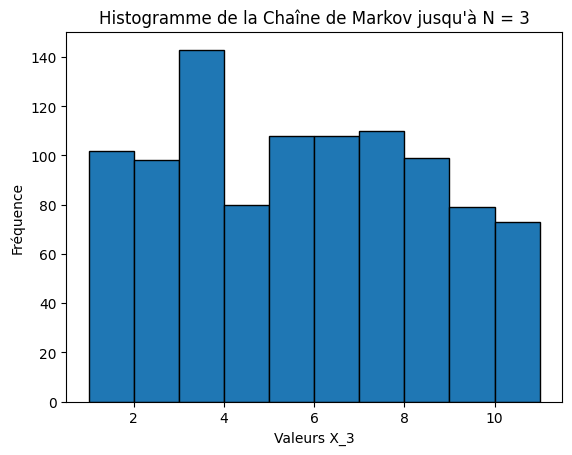

In [9]:
## Question 4

def Q4_chaine_markov(N=3, M=1000):
    P = np.random.random((10, 10))
    P = P/np.sum(P, axis=1)[:, None] # Normalisation des lignes, pour avoir une matrice stochastique
    Mat = np.zeros((N + 1, M), dtype=int)
    Mat[0] = 1
    for n in range(1, N + 1):
        for m in range(0, M):
            s = sim_dis(P[(Mat[n-1, m]) - 1], np.linspace(1, 10, 10, dtype=int), 1)
            Mat[n, m] = s[0]
    return Mat

plt.hist(Q4_chaine_markov()[-1], range=(1, 11), edgecolor='black', linewidth=1)
plt.xlabel("Valeurs X_3")
plt.ylabel("Fréquence")
plt.title("Histogramme de la Chaîne de Markov jusqu'à N = 3")
plt.show()

La moyenne empirique du temps de survie est de 21.17 tours.


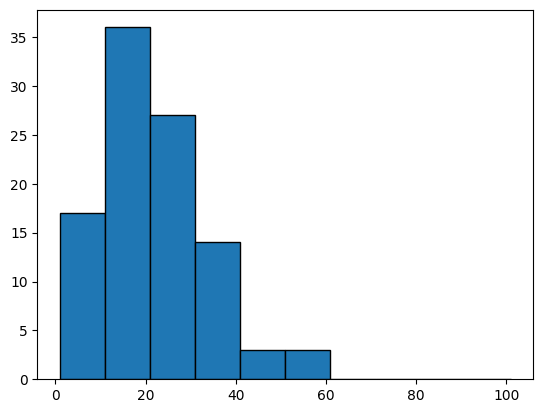

In [10]:
## Question 7

P7 = np.random.random((10, 10))
P7 = P7/np.sum(P7, axis=1)[:, None] # Normalisation des lignes, pour avoir une matrice stochastique

P7M = np.random.random((10, 10))
P7M = P7M/np.sum(P7M, axis=1)[:, None] # Normalisation des lignes, pour avoir une matrice stochastique


def death_time(Ne=5, Ns=10, P=P7, Q=P7M, N=100):
    Nb_tour = 1
    Nb_vivant = Ne
    Mat = np.zeros((N + 1, Ne), dtype=int)
    Mons = [Ns]
    Mat[0] = 1
    while (Nb_vivant > 0 and Nb_tour < N):
        s = sim_dis(Q[(Mons[-1]) - 1], np.linspace(1, 10, 10, dtype=int), 1) # Le monstre se déplace
        Mons.append(s[0])
        for m in range(0, Ne):
            if (Mat[Nb_tour-1, m] != -1):
                s = sim_dis(P[(Mat[Nb_tour-1, m]) - 1], np.linspace(1, 10, 10, dtype=int), 1)
                Mat[Nb_tour, m] = s[0]
                if (Mat[Nb_tour, m] == Mons[-1]):
                    Mat[Nb_tour, m] = -1
            else:
                Mat[Nb_tour, m] = -1
        Nb_vivant = sum(Mat[Nb_tour] != -1)
        Nb_tour += 1
    return Nb_tour - 1 # Car le premier tour n'est pas compté, c'est l'initialisation

Liste_temps = []        
for i in range(0, 100):
    Liste_temps.append(death_time())
plt.hist(Liste_temps, range=(1, 101), edgecolor='black', linewidth=1)
print("La moyenne empirique du temps de survie est de {} tours.".format(np.mean(Liste_temps)))

# Partie 2